# Polynomial Curve Fitting

An implementation of the example of polynomial curve fitting found in chapters 1 and 3 of Christopher Bishops book "Pattern Recognition and Machine Learning".

Setting up the target function and generating training and test data.

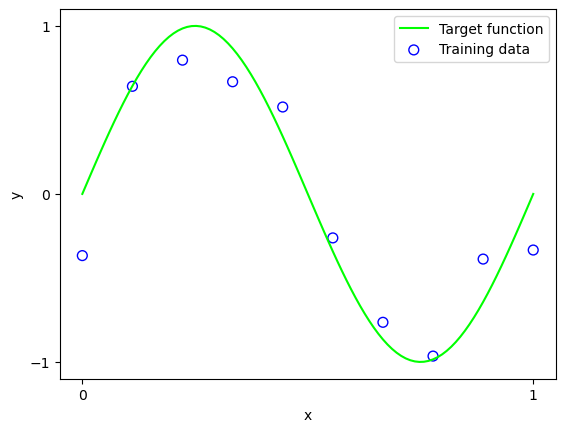

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# target function
target_function = lambda x: np.sin(2 * np.pi * x)

# training data
N = 10
x = pd.Series(np.linspace(0, 1, N))
y = target_function(x) + np.random.normal(0, 0.3, N)
training_data = pd.DataFrame({'x': x, 'y': y})

# test data
x = pd.Series(np.linspace(0, 1, 100))
y = target_function(x) + np.random.normal(0, 0.3, 100)
test_data = pd.DataFrame({'x': x, 'y': y})

# plot training data and target function
fig, ax = plt.subplots()
x = np.linspace(0, 1, 100)
ax.plot(x, target_function(x),label='Target function', color='lime')
ax.scatter(training_data['x'], training_data['y'], s=50, label='Training data', edgecolor='blue', facecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_xticks((0, 1))
ax.set_yticks((-1, 0, 1))
ax.legend()
plt.show()

Fitting the polynomial using the maximum likelihood and least squares approach.

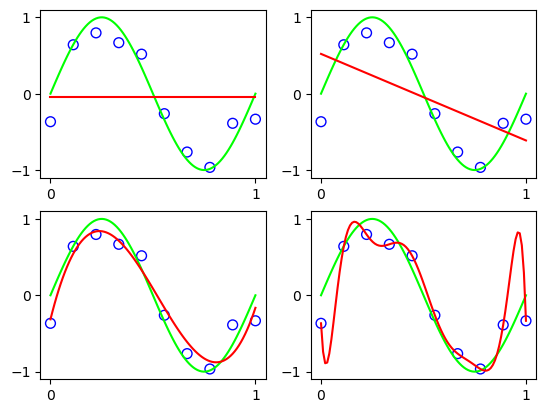

In [14]:
def polynomial_curve_fitting(training_data, order_of_polynomials):
    
    # base function vector
    phi = lambda x: np.array([x ** j for j in range(order_of_polynomials + 1)])

    # design matrix
    D = np.zeros((training_data['x'].size, order_of_polynomials + 1))
    for i in range(training_data['x'].size):
        D[i,:] = phi(training_data['x'][i])

    # maximum likelihood prediction of weight vector
    D_t = D.transpose()
    w_ml = np.linalg.inv(D_t @ D) @ D_t @ training_data['y']
    
    return lambda x: np.dot(w_ml, phi(x))

regression_function = polynomial_curve_fitting(training_data, 10)

# plot target function, training data and regression function
fig, axs = plt.subplots(2,2)
x = np.linspace(0, 1, 100)

# plot for order of polynomials = 0
regression_function = polynomial_curve_fitting(training_data, 0)
axs[0,0].plot(x, target_function(x),label='Target function', color='lime')
axs[0,0].plot(x, regression_function(x), label='Regression function', color='red')
axs[0,0].scatter(training_data['x'], training_data['y'], s=50, label='Training data', edgecolor='blue', facecolor='none')
axs[0,0].set_xticks((0, 1))
axs[0,0].set_yticks((-1, 0, 1))

# plot for order of polynomials = 1
regression_function = polynomial_curve_fitting(training_data, 1)
axs[0,1].plot(x, target_function(x),label='Target function', color='lime')
axs[0,1].plot(x, regression_function(x), label='Regression function', color='red')
axs[0,1].scatter(training_data['x'], training_data['y'], s=50, label='Training data', edgecolor='blue', facecolor='none')
axs[0,1].set_xticks((0, 1))
axs[0,1].set_yticks((-1, 0, 1))

# plot for order of polynomials = 3
regression_function = polynomial_curve_fitting(training_data, 3)
axs[1,0].plot(x, target_function(x),label='Target function', color='lime')
axs[1,0].plot(x, regression_function(x), label='Regression function', color='red')
axs[1,0].scatter(training_data['x'], training_data['y'], s=50, label='Training data', edgecolor='blue', facecolor='none')
axs[1,0].set_xticks((0, 1))
axs[1,0].set_yticks((-1, 0, 1))

# plot for order of polynomials = 9
regression_function = polynomial_curve_fitting(training_data, 9)
axs[1,1].plot(x, target_function(x),label='Target function', color='lime')
axs[1,1].plot(x, regression_function(x), label='Regression function', color='red')
axs[1,1].scatter(training_data['x'], training_data['y'], s=50, label='Training data', edgecolor='blue', facecolor='none')
axs[1,1].set_xticks((0, 1))
axs[1,1].set_yticks((-1, 0, 1))

plt.show()

Evaluating the regression by comparing the *root-mean-square errors* in relationship with the order of polynomials used for fitting the target function.

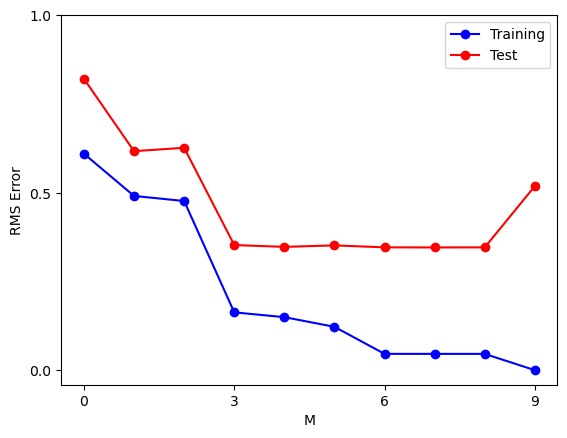

In [22]:
# residual sum of squares (RSS) error
rss = lambda x, y: (1/2) * (np.sum((x - y) ** 2))

# root-mean-square (RMS) error
rms = lambda x, y: np.sqrt((2/len(x)) * rss(x,y))

# calculating RMS errors
rms_training = np.zeros(N)
rms_test = np.zeros(N)
indices = np.arange(N)
for i in indices:
    regression_function = polynomial_curve_fitting(training_data, i)
    rms_training[i] = rms(regression_function(training_data['x'].to_numpy()), training_data['y'])
    rms_test[i] = rms(regression_function(test_data['x'].to_numpy()), test_data['y'])
    
# plot RMS erros
fig, ax = plt.subplots()
ax.plot(indices, rms_training, linestyle='-', marker='o', label='Training', color='blue')
ax.plot(indices, rms_test, linestyle='-', marker='o', label='Test', color='red')
ax.set_xlabel('M')
ax.set_ylabel('RMS Error')
ax.set_xticks(np.arange(0,10,3))
ax.set_yticks((0, 0.5, 1))
ax.legend()
plt.show()